This is a notebook that tests and illustrates how M-E works for the polarized case. 

In [17]:
from pymilne import milne
import numpy as np
import matplotlib.pyplot as plt


In [18]:
lambda0 = 6301.5080
JUp = 2.0
JLow = 2.0
gUp = 1.5
gLow = 1.833
lambdaStart = 6300.8
lambdaStep = 0.03
nLambda = 50


In [19]:
lineInfo = np.asarray([lambda0, JUp, JLow, gUp, gLow, lambdaStart, lambdaStep])

# Define the model
BField = 1500.0
BTheta = 70.0
BChi = 15.0
V_los = 2.0
damping = 0.1
B0 = 0.8
B1 = 0.2
mu = 1.0
VDop = 0.085
kl = 15.0
modelSingle = np.asarray([BField, BTheta, BChi, V_los, damping, B0, B1, VDop, kl])

# Generate the object and do one synthesis. The wavelength axis is a property of the object
s = milne(nLambda, lineInfo)
stokes = s.synth(modelSingle,mu)


In [20]:
stokes.shape

(4, 50)

In [21]:
modelSingle = np.asarray([BField, BTheta, BChi, 0.0, damping, B0, B1, VDop, kl])
stokes2 = s.synth(modelSingle,mu)

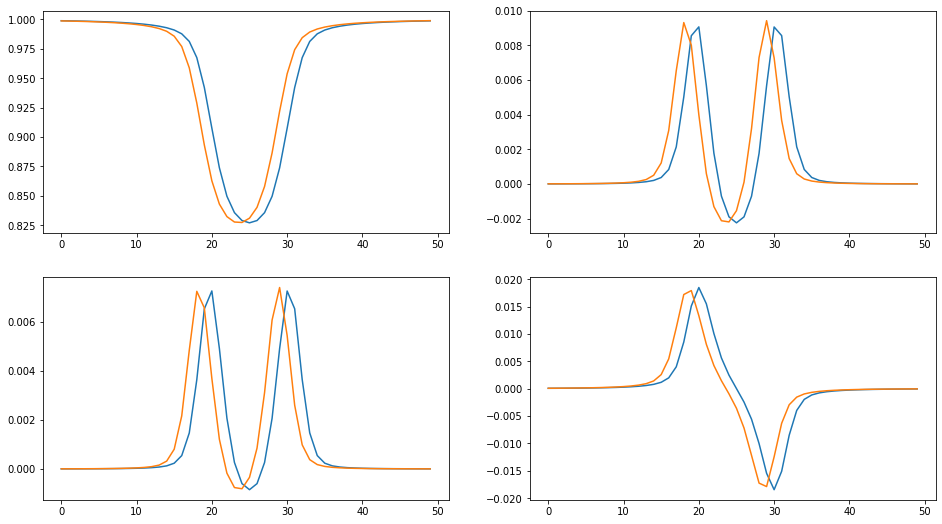

In [22]:
plt.figure(figsize=[16,9])
plt.subplot(221)
plt.plot(stokes[0])
plt.plot(stokes2[0])
plt.subplot(222)
plt.plot(stokes[1])
plt.plot(stokes2[1])
plt.subplot(223)
plt.plot(stokes[2])
plt.plot(stokes2[2])
plt.subplot(224)
plt.plot(stokes[3])
plt.plot(stokes2[3])


In [23]:
#let's actually create the model

In [40]:
def chisq(params,ll,obs,errors,mu,s):
    
    #calculate model
    calc = s.synth(params,mu)
    
    #residuals
    res = (obs-calc)/errors
    # scale residuals
    res[0] /= 10.
    
    chisquared = np.sum(res**2.0)
    return chisquared

In [41]:
modelTest = np.asarray([2000.0,45.0,22.5,1.0,1E-3,0.5,0.5,0.1,10])
chisq(modelTest,0,stokes,1E-3,1.0,s)

75284.28903553118

In [42]:
from scipy.optimize import minimize

result = minimize(chisq,modelTest,args=(0,stokes2,1E-3,1.0,s),method='Nelder-Mead')
result = minimize(chisq,result.x,args=(0,stokes2,1E-3,1.0,s))

print("Chi sq = ", chisq(result.x,0,stokes2,1E-3,1.0,s))

for i in range(0,len(modelSingle)):
    print (modelSingle[i],result.x[i])

Chi sq =  9.681618888748808
1500.0 1457.1654574544189
70.0 70.4859207477406
15.0 15.14860726362677
0.0 0.014162528493793982
0.1 0.0350303478782315
0.8 0.7925405780789109
0.2 0.20429354060884444
0.085 0.09252261214257076
15.0 11.448363227722828


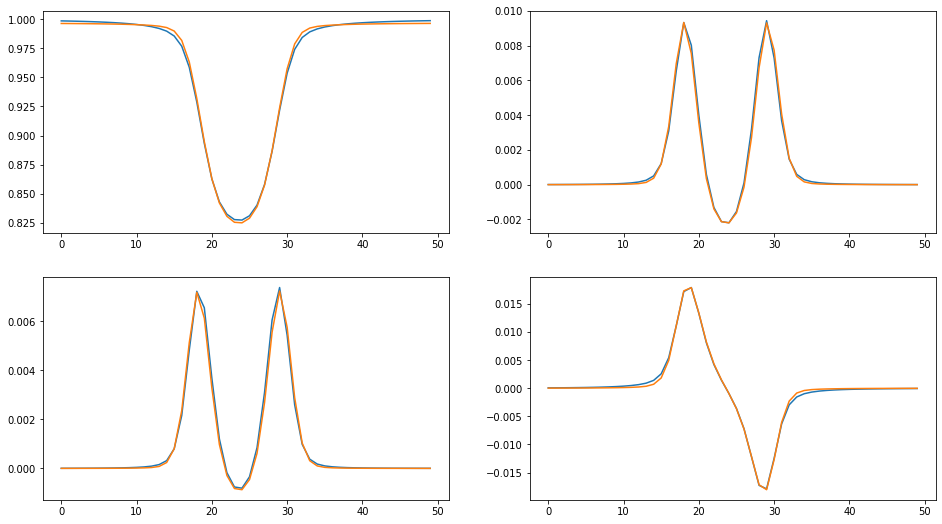

In [43]:
fit = s.synth(result.x,mu)

plt.figure(figsize=[16,9])
plt.subplot(221)
plt.plot(stokes2[0])
plt.plot(fit[0])
plt.subplot(222)
plt.plot(stokes2[1])
plt.plot(fit[1])
plt.subplot(223)
plt.plot(stokes2[2])
plt.plot(fit[2])
plt.subplot(224)
plt.plot(stokes2[3])
plt.plot(fit[3])